# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjuto de dados

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos dados

![Minha Imagem](gorjeta.jpg)

**"tips: Tipping data"** é um conjunto de dados com informações registradas por um garçom sobre cada gorjeta que recebeu durante alguns meses trabalhando em um restaurante.
Tal conjunto de dados pode ser utilizado em tarefas de aprendizado de máquina supervisionado em tarefas de classificação, sendo `tips`, a variável dependente e o restante utilizado como variáveis preditoras.

## 2.1 Dicionário de dados

In [3]:
dicionario = pd.read_csv('../data/external/dictonary.csv')
dicionario

,variable,description,type,subtype
0,total_bill,total da conta,quantitativo,contínuo
1,tip,valor da gorjeta,quantitativo,contínuo
2,sex,sexo do pagador,qualitativo,nominal
3,smoker,há fumantes ?,qualitativo,nominal
4,day,dia da semana,qualitativo,ordinal
5,time,horário do dia,qualitativo,nominal
6,size,tamanho do grupo,quantitativo,discreto


_______________________________________________________________________________________________________

-São 7 variaveis no total, sendo 2 quantitativos continuos e 1 discreto, 3 qualitativos nominais e 1 ordinal

_______________________________________________________________________________________________________

## 3. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre o sexo, espécie e as características físicas dos pinguins?
- Existe alguma relação entre a ilha, espécie e as características físicas dos pinguins?
- Existem correlações entre estas características físicas?

## Existem dados faltantes, se sim quantos e em quais variáveis?

In [4]:
# colunas (variáveis) contendo valores valtantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]`contém valores faltantes. Além disso sabemos que temos `0` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

## Qual a distribuição dos dados (variável por variável)?

Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [5]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


_______________________________________________________________________________________________________

Através dos dados oferecidos, sabemos que:

- 244 registros, 157 são do sexo Masculino.
- A maioria das transações ocorrem no jantar, 176 dos casos.
- O dia da semana mais comum, com 87 dos registros ocorrem no Sábado.
- Os "não fumantes" representam a maioria, com presença de 151 dos registros.
- O tamanho dos grupos variam entre 1 até 6 pessoas, com uma média de 2.5, o qual sugere que grande parte das pessoas frequentam o restaurante em sua grande maioria em duplas ou trios.
- *Os Valores totais da refeição em dólares variam entre: `US$ 3,00` a `US$ 50,00`*
- As gorjetas variam entre `US$ 1,00` a `US$ 10,00`, tendo uma mediana `US$ 2,90`
_______________________________________________________________________________________________________

Distribuição das váriaveis qualitativas:

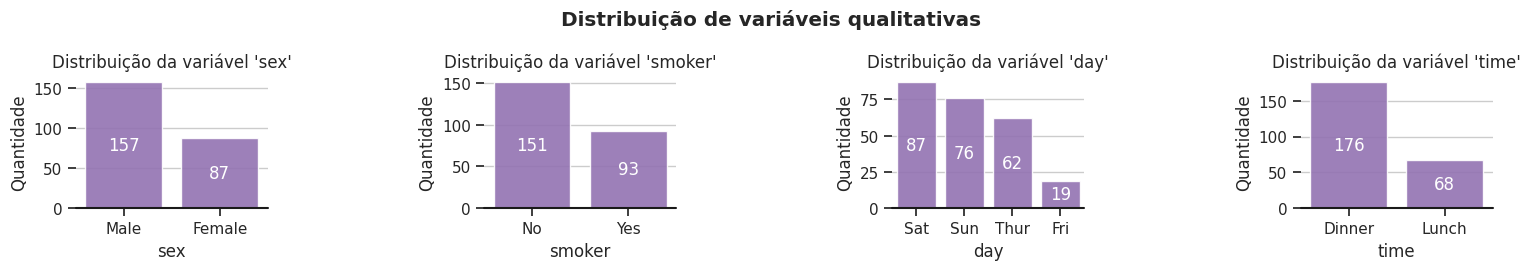

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df', 'dicionario' e 'colors' já estejam definidos
qualitative_vars = dicionario.query("type == 'qualitativo'").variable.to_list()
num_vars = len(qualitative_vars)

# Ajuste o número de subplots
fig, axes = plt.subplots(1, num_vars, figsize=(4*num_vars, 3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')

# Se houver apenas uma variável qualitativa, axes não será uma lista, então trate isso separadamente
if num_vars == 1:
    axes = [axes]

for i, variable in enumerate(qualitative_vars):
    order = df[variable].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variable,
        ax=axes[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variable}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()


_______________________________________________________________________________________________________

- A maioria dos clientes que oferecem gorjetas são homens.
- Os não fumantes representam a maioria dos clientes que dão gorjeta.
- O dia em que o garçom recebe mais gorjetas é no Sábado e o menor é na Sexta-Feira.
- O pico de gorjetas é durante o jantar.

_______________________________________________________________________________________________________

Distribuição das variáveis quantitativa


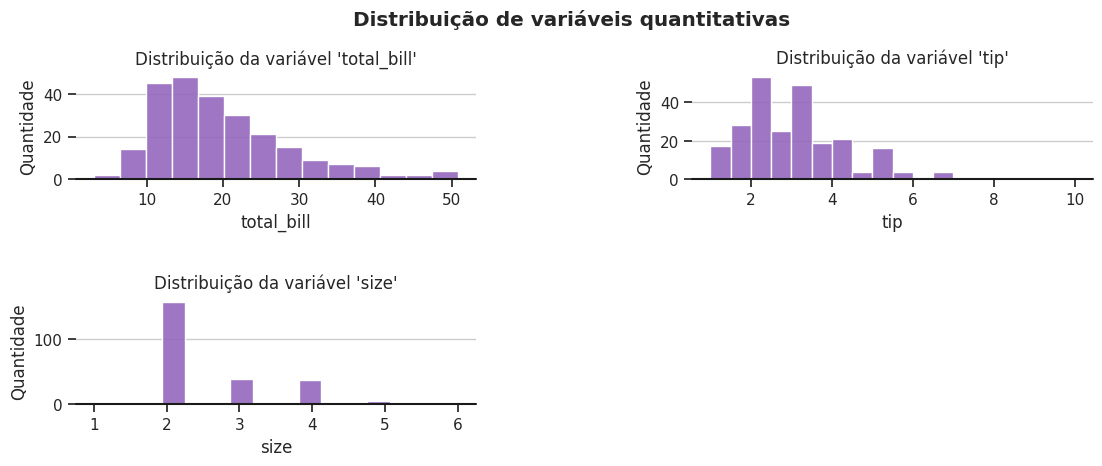

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df', 'dicionario' e 'colors' já estejam definidos
quantitative_vars = dicionario.query("type == 'quantitativo'").variable.to_list()
num_vars = len(quantitative_vars)

# Ajuste o número de subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))  # Criando uma grade de 2x2 para até 4 variáveis
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')

# Se houver menos de 4 variáveis, ajuste a quantidade de subplots
if num_vars < 4:
    for i in range(num_vars, 4):
        fig.delaxes(axes.flatten()[i])

for i, variable in enumerate(quantitative_vars):
    ax = sns.histplot(
        data=df,
        x=variable,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variable}'")
    ax.set_xlabel(variable)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines

plt.show()


_______________________________________________________________________________________________________

A partir das visualizações acima podemos dizer que:
- A distribuição da variável da conta total tem valores mais frequentes entre 10 a 20 `U$`.
- A distribuição da variável de gorjeta tem valores mais frequentes entre 2 a 4 `U$`.
- As pessoas que frequentam o local costumam em sua grande maioria visitar em duplas.

_______________________________________________________________________________________________________

## Existe alguma relação entre o genero e a gorjeta?

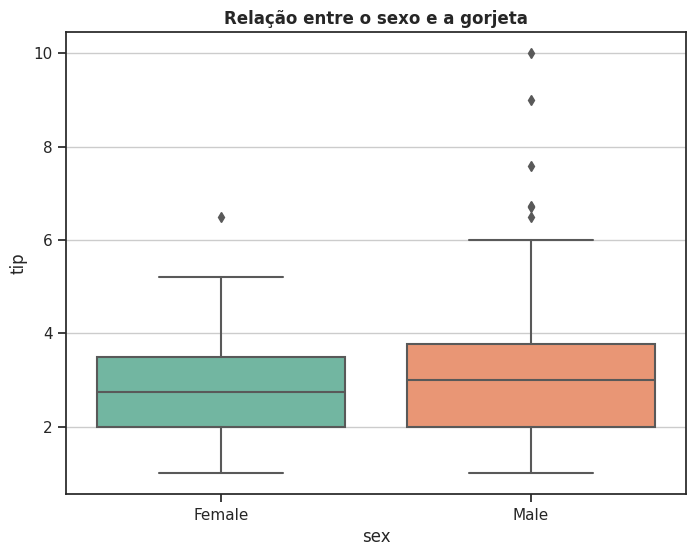

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Relação entre o sexo e a gorjeta', fontweight='bold')

# Criar o boxplot
ax = sns.boxplot(
    x="sex", 
    y="tip", 
    data=df,
    palette="Set2"  # Escolhendo a paleta de cores para diferenciar sexos
)

# Configurar grade
ax.grid(axis='y', linestyle='-')

# Mostrar o gráfico
plt.show()


_________________________________________________________________________________________________________________________________________________

- A partir do gráfico, podemos inferir que há variação nos valores de gorjetas entre homens e mulheres. 
- Ambos os grupos tem valores atípicos, indicando que existem casos de gorjetas incomumente altas
- A mediana das gorjetas parece ser ligeiramente maior para os homens em comparação com as mulheres.
_________________________________________________________________________________________________________________________________________________

## 4. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:
- Homens tem mais tendência em pagar gorjetas.
- No jantar é o maior pico.
- Sábado é o dia mais frequentado


## 5. Observação

Não é recomendável tirar conclusões precisas a respeito do assunto pois existem fatores externos não analisados na pesquisa que podem interferir nos resultados. Como por exemplo humor do cliente ou o quanto eles ganham, se há algum evento rolando nas proximidades...